# Exploration

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72

import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('suicide-rates.csv')

print(f'Number of datapoints: {len(df)} \nNumber of features: {len(df.columns)}\n')
print('-----------------------------')
print('Feature datatypes')
print('-----------------------------')
print(df.dtypes)
print('-----------------------------\n')

df.head()

Number of datapoints: 27820 
Number of features: 12

-----------------------------
Feature datatypes
-----------------------------
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object
-----------------------------



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Uniqueness of nominal features

In [3]:
print(f"Country column unique members: {len(df['country'].unique())}")
print(df['country'].unique())
print('-----------------------------\n')

print(f"Sex column unique members: {len(df['sex'].unique())}")
print(df['sex'].unique())
print('-----------------------------\n')

print(f"Age column unique members: {len(df['age'].unique())}")
print(df['age'].unique())
print('-----------------------------\n')

print(f"Generation column unique members: {len(df['generation'].unique())}")
print(df['generation'].unique())
print('-----------------------------\n')

Country column unique members: 101
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singap

### Plotting the dependent variable

In [ ]:
suicide_bins = len(df['country'].unique())

df['suicides/100k pop'].hist(bins=suicide_bins)

plt.title('Normalized Dependent Variable')
plt.xlabel('suicides/100k pop')
plt.ylabel('Count')
plt.show()

# Remove suicide_no, perhaps population too
# do not need year, age, and generation -- can drop one. I think dropping generation would be best
# drop gdp per year because it is not normalized (we have gdp per capita which is normalized so much better)
# HDI (human development index) for year is weird (if this can be enriched, that would be nice). could bring in vulnerability index

# your dependent variable is suicides/100k pop and should be cut via mean + standard deviation?

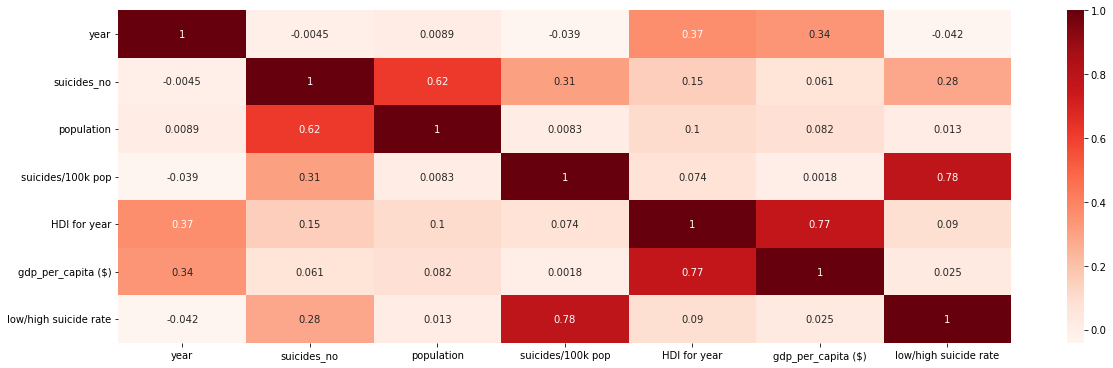

In [72]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds')
plt.show()

The most highly correlated (before pre-processing) features are HDI and GDP per capita as well as population and suicide numbers (which is obvious). 

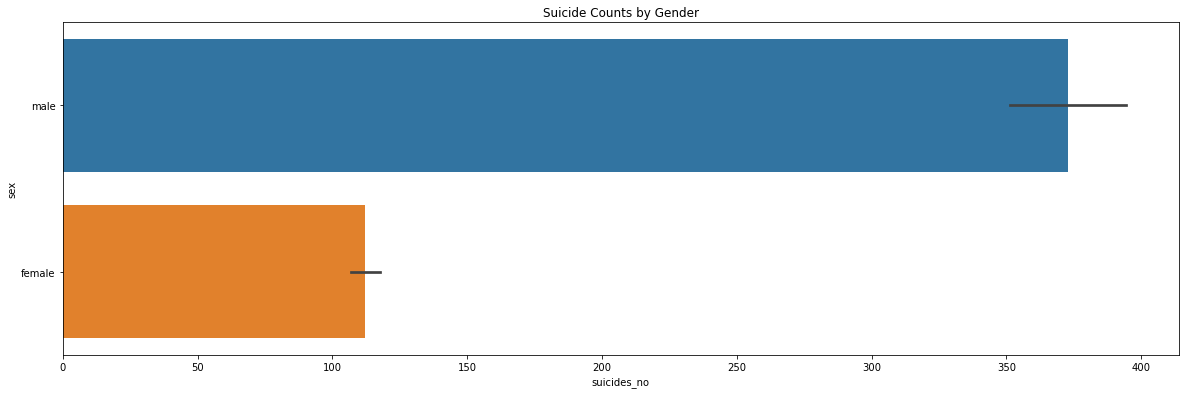

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x="suicides_no", y="sex")
plt.title('Suicide Counts by Gender')
plt.show()

Males are clearly much more likely to commit suicide than females. Does this differ by age group?

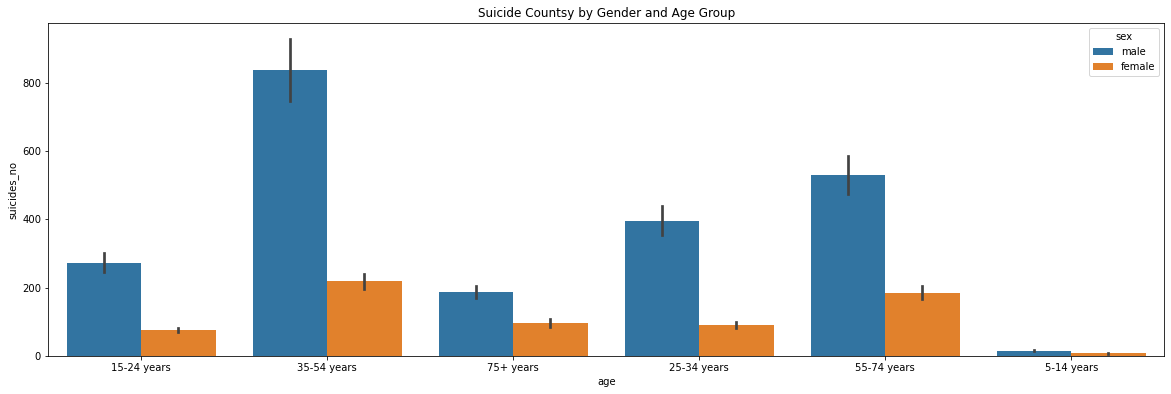

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = df)
plt.title("Suicide Countsy by Gender and Age Group")
plt.show()

The pattern of males committing more suicide continues by age group, with the most suicides happening between 35-74 years of age. What about by generation? I would assume the pattern continues, since generation is a proxy for age of sorts, but lets confirm.

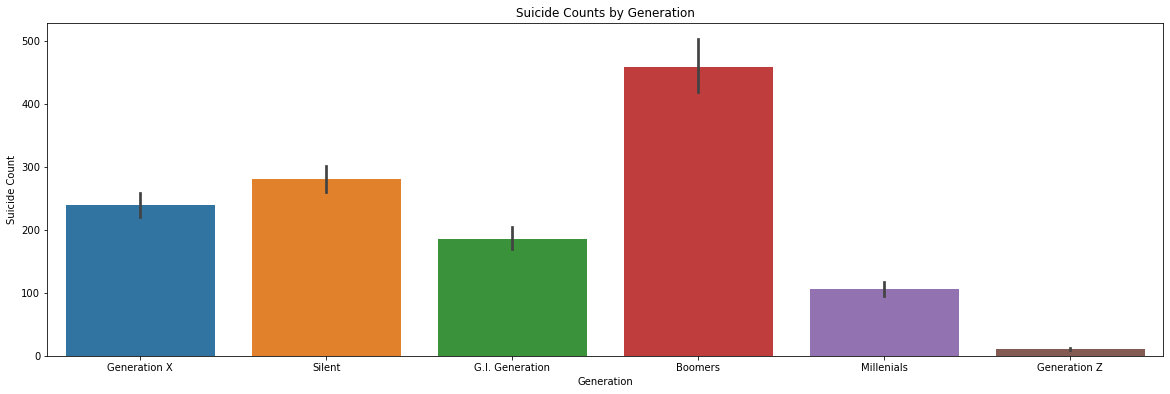

In [42]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['generation'], y=df['suicides_no'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Suicide Counts by Generation')
plt.show()

The Boomer and Silent generations have the most suicides, which makes sense considering they go from 1928-1964. What about by country? Is that important?

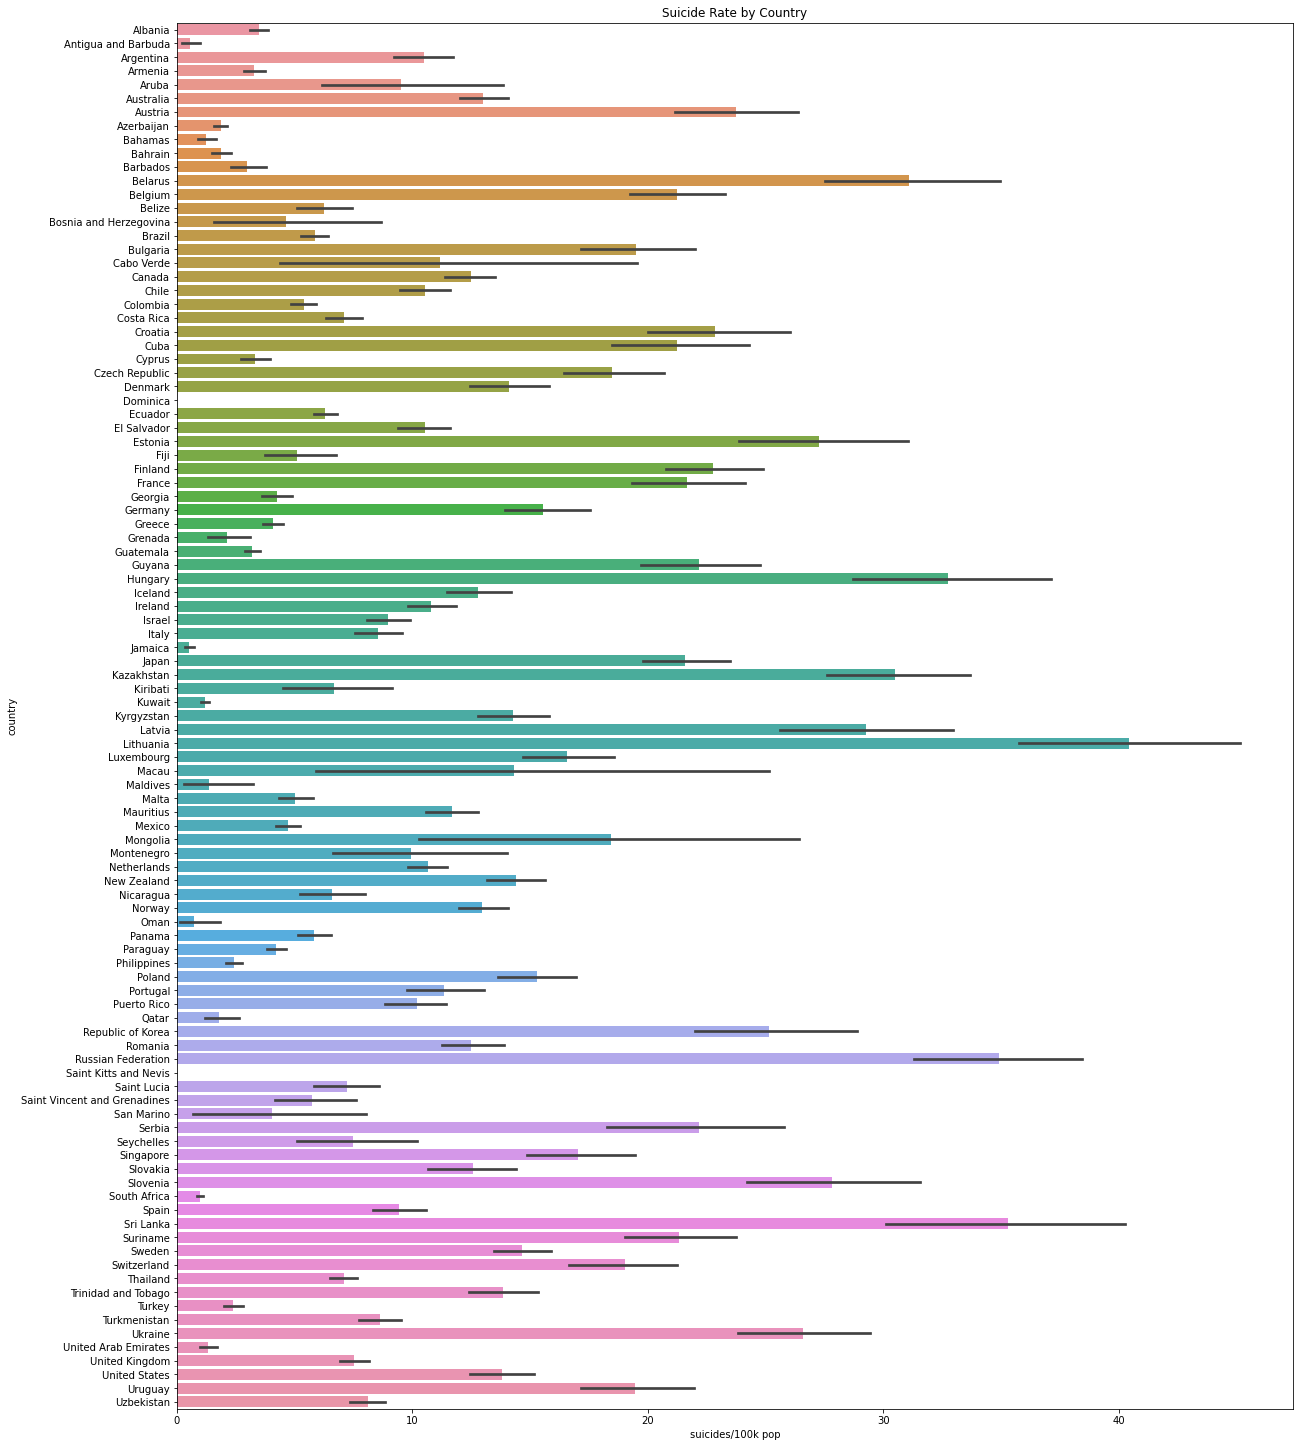

In [46]:
plt.figure(figsize=(20,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = df)
plt.title('Suicide Rate by Country')
plt.show()

Suicide rate seems to be pretty randomly distributed by country -- not seeing any patterns here. Lithuania has the most suicides, while Antigua has the least.

What about the suicide rate over time? Is it increasing or decreasing?

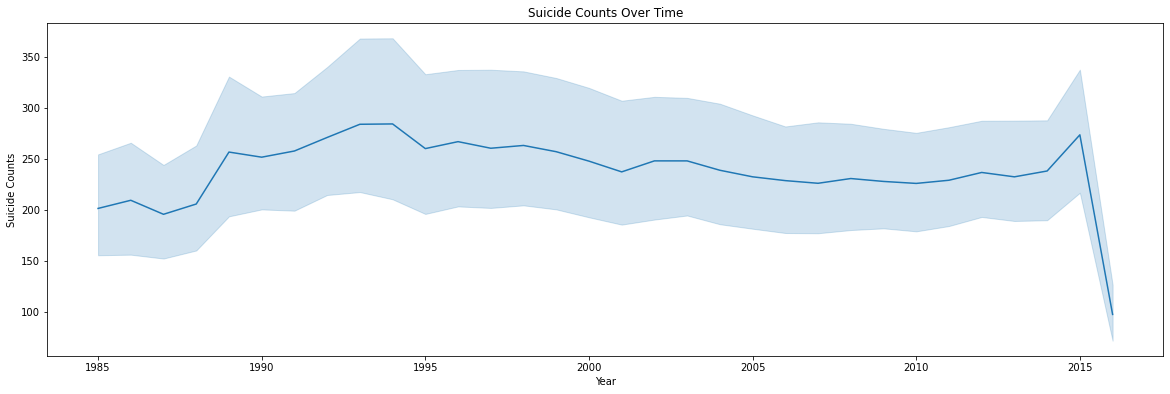

In [51]:
plt.figure(figsize=(20,6))
sns.lineplot(x='year', y='suicides_no', data=df)
plt.xlabel('Year')
plt.ylabel('Suicide Counts')
plt.title('Suicide Counts Over Time')
plt.show()

It seems that the number of suicides was relatively static for a long time...until something happened around 2015 which made them drop percipitously. This is fantastic news, and I hope the trend has continued to today.

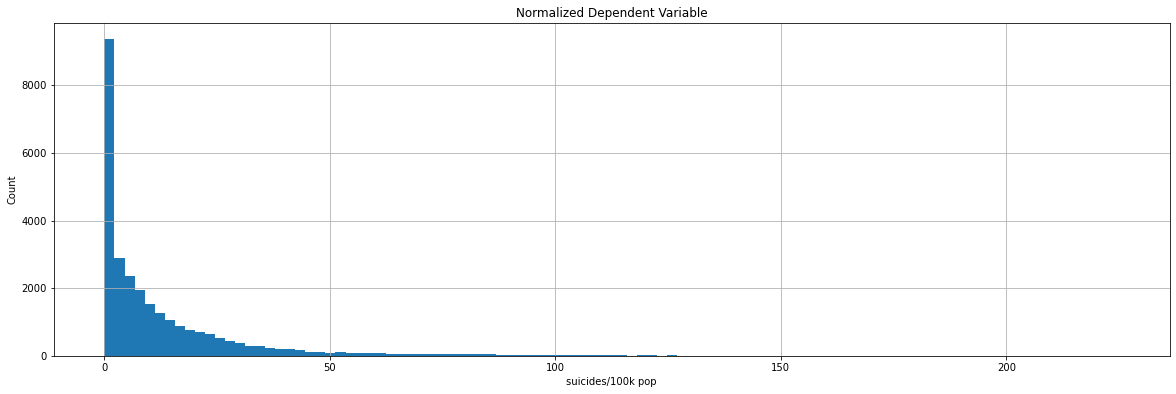

In [57]:
plt.figure(figsize=(20,6))
df['suicides/100k pop'].hist(bins=len(df['country'].unique()))
plt.title('Normalized Dependent Variable')
plt.xlabel('suicides/100k pop')
plt.ylabel('Count')
plt.show()

### Questions

1. I believe the most important information to "machine learn" here is the suicide count as it relates to predicting whether suicides would be low or high. Since we are talking about suicide here, which is a horrible thing, I think if it were possible to predict basically the direction of these suicides, then people could potentially intervene to stop it. Is it learnable? I really hope so, but my gut is telling me that it is not (at least from this data).

<br>

2. I believe this should be set up as a supervised regression problem using random forests, where, given the data, the model would predict the suicide rate. After that, we can use the predicted suicide rate to do a binary classification via binning/thresholding which would classify that rate into one of two buckets, the "low suicide rate" or "high suicide rate". In terms of unsupervised approaches, we could potentially use PCA or clustering to see if there are any patterns in the dataset. This may also help us drop unnecessary columns to increase the performance of our random forest model. However, you mentioned in your instructions that we should try and determine whether the outcome is suicide or not via a binary variable with "low suicide rate" and "high suicide rate". In order to accomplish this, we could take the mean of the suicide rate, add a half standard deviation to it, then use that number as a threshold to create a new column in the dataset which would be the low/high suicide rate binary feature. If our suicide rate was above this number, it would be considered high, while below the number would be considered low. The problem could then be set up as a classification problem where the random forest would try and predict on that.

<br>

3. In my view, the dependant variable should be the suicide rate (suicides/100k pop) if we were to set this up as a regression problem. If we were to set this up as a classification problem, the dependent variable should then be the column I spoke about in the #2 answer (low/high suicide rate).


In [69]:
suicide_rate_mean = df['suicides/100k pop'].mean()
suicide_rate_std = df['suicides/100k pop'].std()

print(f'Suicide Rate mean: {suicide_rate_mean:.3f} and std: {suicide_rate_std:.3f}')

suicide_rate_mean_plus_std = suicide_rate_mean + suicide_rate_std/2

print(f'Suicide rate mean + std: {suicide_rate_mean_plus_std:.3f}')
df['low/high suicide rate'] = [1 if num >= suicide_rate_mean_plus_std else 0 for num in df['suicides/100k pop']]

df['low/high suicide rate'].value_counts()

Suicide Rate mean: 12.816 and std: 18.962
Suicide rate mean + std: 22.297


0    22786
1     5034
Name: low/high suicide rate, dtype: int64

### Feature Correlation Matrix

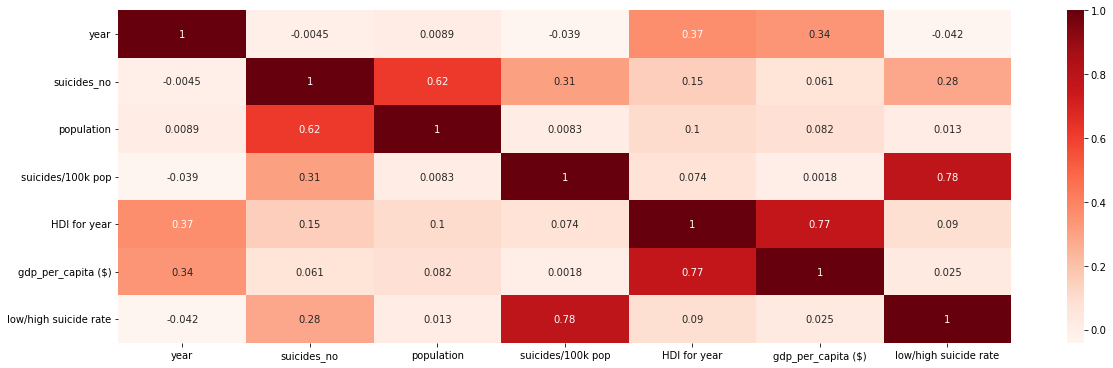

In [71]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds')
plt.show()

In [6]:
# You dont need year, age, and generation as they are all related.
# Dropping age as year and generation are enough
# df = df.drop('age', axis=1)

# Dropping suicide_no as its just a count of suicides which is meaningless
# df = df.drop('suicides_no', axis=1)

# Dropping population as it is not relevant either
# df = df.drop('population', axis=1)

# Dropping gdp for year because we have normalized gpd per capita
# df = df.drop(' gdp_for_year ($) ', axis=1)

# Dropping country-year because we have country and year, and derived value doesnt make sense
# df = df.drop('country-year', axis=1)

# df = df.reset_index()
# df.head()